<a href="https://colab.research.google.com/github/samaramms/MonkeypoxTraining/blob/main/Monkeypox_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **I - Importando as bibliotecas a serem utilizadas:**





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# **II - Importando os dataframes a serem analisados:**

1 - Casos Mundiais

In [ ]:
df_monkeypox_world = pd.read_csv("/content/Monkey_Pox_Cases_Worldwide.csv")
df_monkeypox_world

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3050.0,0.0,5.0,2.0,7.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
2,Spain,5792.0,0.0,13.0,2.0,0.0
3,United States,14050.0,0.0,4.0,41.0,10.0
4,Canada,1168.0,11.0,1.0,3.0,0.0
...,...,...,...,...,...,...
111,Central African Republic,8.0,9.0,0.0,0.0,0.0
112,Republic of Congo,3.0,5.0,0.0,0.0,0.0
113,Cameroon,7.0,27.0,0.0,0.0,0.0
114,Liberia,2.0,0.0,0.0,0.0,0.0


In [ ]:
df_monkeypox_world.shape #linhas e colunas, respectivamente, no dataset

(116, 6)

In [ ]:
df_monkeypox_world.columns #o que há em cada coluna

Index(['Country', 'Confirmed_Cases', 'Suspected_Cases', 'Hospitalized',
       'Travel_History_Yes', 'Travel_History_No'],
      dtype='object')

In [ ]:
df_monkeypox_world.isnull().sum() #verificando se há algum arquivo NaN/nulo/sem dados. Não há.

Country               0
Confirmed_Cases       0
Suspected_Cases       0
Hospitalized          0
Travel_History_Yes    0
Travel_History_No     0
dtype: int64

In [ ]:
df_monkeypox_world.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,359.853448,22.456897,1.163793,2.189655,0.741379
std,1516.114188,207.432981,2.892100,4.976316,3.664449
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,0.000000,1.000000,3.000000,0.000000
max,14050.000000,2217.000000,18.000000,41.000000,34.000000


2 - Casos ao longo do tempo

In [ ]:
casos_tempo = pd.read_csv("/content/Worldwide_Case_Detection_Timeline.csv")
casos_tempo

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
42036,2022-08-22,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42037,2022-08-22,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42038,2022-08-22,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42039,2022-08-22,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
casos_tempo.columns

Index(['Date_confirmation', 'Country', 'City', 'Age', 'Gender', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Isolated (Y/N/NA)',
       'Travel_history (Y/N/NA)'],
      dtype='object')

In [ ]:
casos_tempo.isnull().sum() 
#nota: aqui há dados faltantes, entretanto, para esse caso, remover alguns objetos NaN pode levar a uma analise precipitada dos nosso dados

Date_confirmation              0
Country                        0
City                       40951
Age                        39419
Gender                     39877
Symptoms                   41864
Hospitalised (Y/N/NA)      41768
Isolated (Y/N/NA)          41665
Travel_history (Y/N/NA)    41729
dtype: int64

In [ ]:
casos_tempo.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,42041,42041,1090,2622,2164,177,273,376,312
unique,110,98,160,80,5,80,2,1,2
top,2022-08-08,United States,Toronto,20-69,male,genital ulcer lesions,N,Y,Y
freq,1988,14293,396,585,2128,30,160,376,228


**III - Tratamento e seleção dos dados a trabalhar:**

In [ ]:
#traduzindo as colunas pro português (Os países seguem com nome em ingles)

renomear = {'Country' : 'País',
            'Confirmed_Cases': 'Casos Confirmados',
            'Suspected_Cases':'Casos Suspeitos',
            'Hospitalized' : 'Hospitalizados',
            'Travel_History_Yes': 'Viagem: Positivo', 
            'Travel_History_No' : 'Viagem: Negativo'}

In [ ]:
df_monkeypox_world.rename(columns = renomear, inplace = True)
df_monkeypox_world


,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
0,England,3050.0,0.0,5.0,2.0,7.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
2,Spain,5792.0,0.0,13.0,2.0,0.0
3,United States,14050.0,0.0,4.0,41.0,10.0
4,Canada,1168.0,11.0,1.0,3.0,0.0
...,...,...,...,...,...,...
111,Central African Republic,8.0,9.0,0.0,0.0,0.0
112,Republic of Congo,3.0,5.0,0.0,0.0,0.0
113,Cameroon,7.0,27.0,0.0,0.0,0.0
114,Liberia,2.0,0.0,0.0,0.0,0.0


In [ ]:
casos_mundiais = df_monkeypox_world
casos_mundiais 

,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
0,England,3050.0,0.0,5.0,2.0,7.0
1,Portugal,770.0,0.0,0.0,0.0,34.0
2,Spain,5792.0,0.0,13.0,2.0,0.0
3,United States,14050.0,0.0,4.0,41.0,10.0
4,Canada,1168.0,11.0,1.0,3.0,0.0
...,...,...,...,...,...,...
111,Central African Republic,8.0,9.0,0.0,0.0,0.0
112,Republic of Congo,3.0,5.0,0.0,0.0,0.0
113,Cameroon,7.0,27.0,0.0,0.0,0.0
114,Liberia,2.0,0.0,0.0,0.0,0.0


In [ ]:
casos_mundiais["País"].unique() #vendo os países que compõem essa series

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

Casos ao longo do tempo:

In [ ]:
casos_tempo.head(5)

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [ ]:
casos_tempo.drop(columns = ['Date_confirmation', 'City', 'Isolated (Y/N/NA)', 'Hospitalised (Y/N/NA)', 'Travel_history (Y/N/NA)' ], inplace = True)
casos_tempo

,Country,Age,Gender,Symptoms
0,Nigeria,NaN,NaN,NaN
1,Nigeria,NaN,NaN,NaN
2,Nigeria,NaN,NaN,NaN
3,Cameroon,0-39,NaN,NaN
4,Cameroon,0-39,NaN,NaN
...,...,...,...,...
42036,Denmark,NaN,NaN,NaN
42037,Denmark,NaN,NaN,NaN
42038,Denmark,NaN,NaN,NaN
42039,Denmark,NaN,NaN,NaN


In [ ]:
casos_tempo.columns

Index(['Country', 'Age', 'Gender', 'Symptoms'], dtype='object')

In [ ]:
renomear_2 ={'Country' : 'País',
            'Age': 'Idade',
            'Gender':'Gênero',
            'Symptoms' : 'Sintomas'}
    

# **III - Começando algumas visualizações**

* Os 10 países com maior número de casos

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

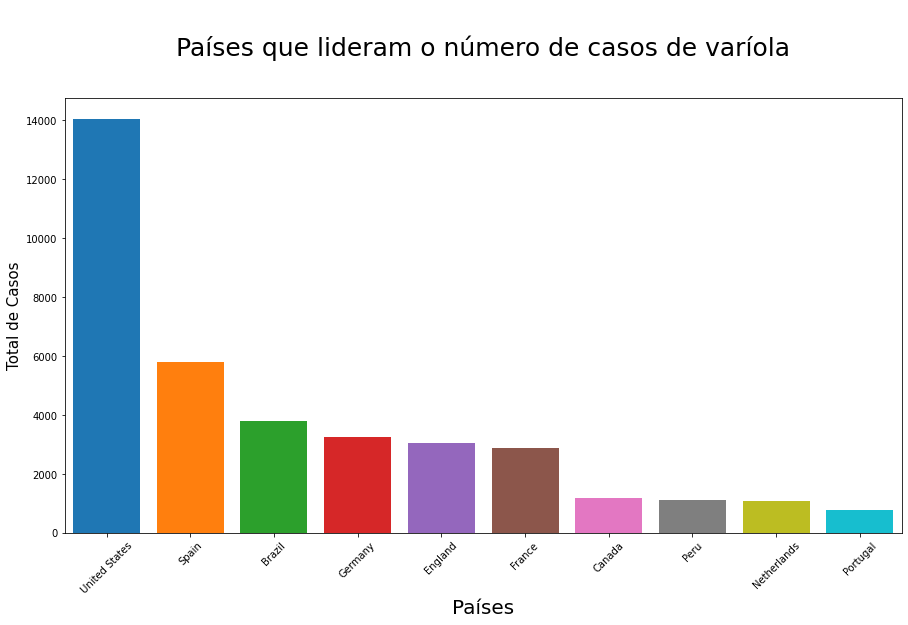

In [ ]:
plt.subplots(figsize=(15,8))
casos_mundiais = casos_mundiais.sort_values(["Casos Confirmados"], ascending = False)[:10]
plot = sns.barplot(x=casos_mundiais["País"][:10],y=casos_mundiais["Casos Confirmados"], saturation=1)
plot.axes.set_title("\nPaíses que lideram o número de casos de varíola\n",fontsize= 25, pad = 15)
plt.xlabel("Países", fontsize = 20)
plt.ylabel("Total de Casos", fontsize = 15)
plt.xticks(rotation=45)

In [ ]:
casos_mundiais.head(5)

,País,Casos Confirmados,Casos Suspeitos,Hospitalizados,Viagem: Positivo,Viagem: Negativo
3,United States,14050.0,0.0,4.0,41.0,10.0
2,Spain,5792.0,0.0,13.0,2.0,0.0
37,Brazil,3788.0,7.0,3.0,20.0,4.0
10,Germany,3266.0,0.0,18.0,19.0,16.0
0,England,3050.0,0.0,5.0,2.0,7.0


* Os 10 países com mais hospitalizações

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

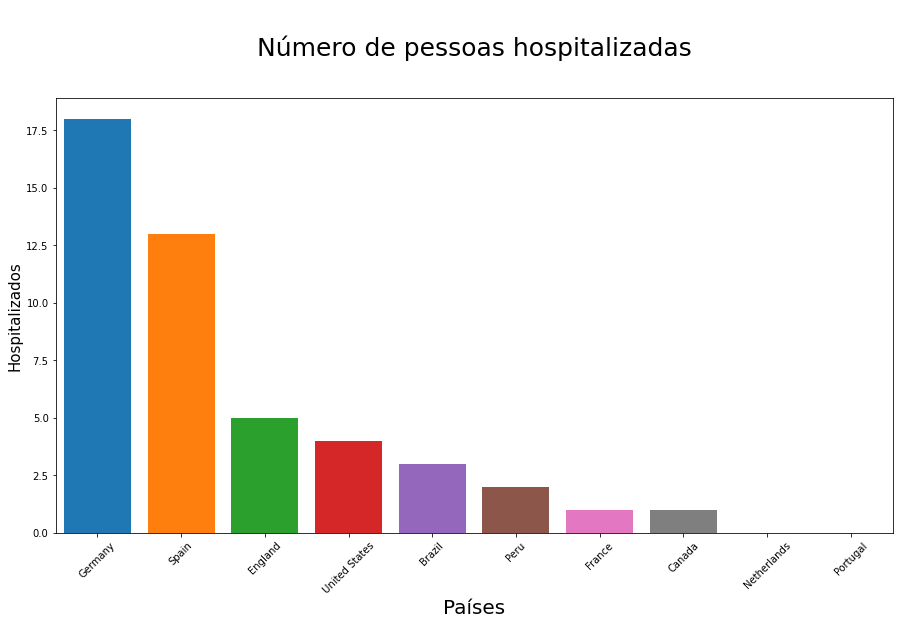

In [ ]:
plt.subplots(figsize=(15,8))
casos_mundiais = casos_mundiais.sort_values(["Hospitalizados"], ascending = False)[:10]

plot = sns.barplot(x=casos_mundiais["País"][:10],y=casos_mundiais["Hospitalizados"], saturation=3)
plot.axes.set_title("\nNúmero de pessoas hospitalizadas\n",fontsize= 25, pad = 15)
plt.xlabel("Países", fontsize = 20)
plt.ylabel("Hospitalizados", fontsize = 15)
plt.xticks(rotation=45)

Mesmo com os altos números de Casos Confirmados, os casos hospitalizados ainda são baixos.
Apesar de os EUA liderarem o número de casos, a Alemanha possui o maior número de pessoas hospitalizadas

* Pessoas hospitalizadas x Casos Confirmados

In [ ]:
porcentagem_hospitalizados = (casos_mundiais['Hospitalizados'].sum()/casos_mundiais['Casos Confirmados'].sum()) * 100
print('A porcentagem de pessoas hospitalizadas é de {}%'.format (porcentagem_hospitalizados.round(2)))

A porcentagem de pessoas hospitalizadas é de 0.13%


A baixa porcentagem de pessoas hospitalizadas pode nos dizer que a maioria das pessoas não tem sintomas tão graves que acabem precisando ser hospitalizadas. Entretanto, algumas pessoas podem não ir ao hospital em alguns países por não terem recursos financeiros. 

* Buscando algumas correlações:

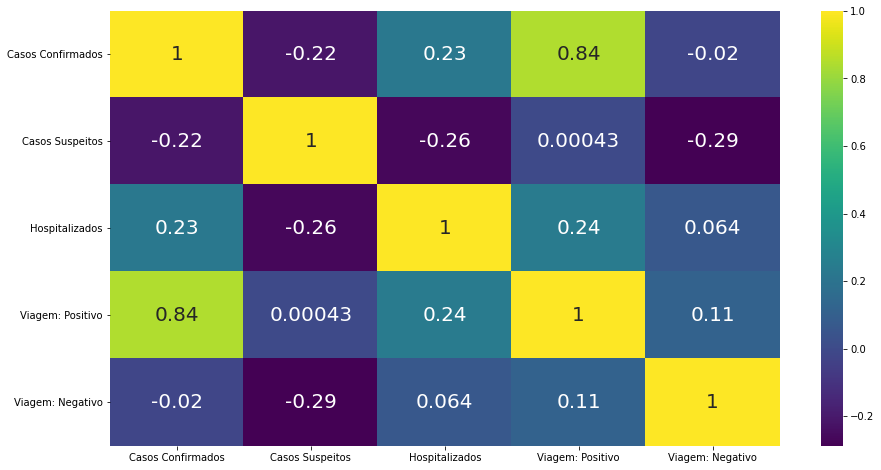

In [ ]:
plt.figure(figsize=(15,8))

sns.heatmap(casos_mundiais.corr(),cmap = 'viridis', annot=True, annot_kws={"size": 20})
plt.show()

Segundo o heatmap acima, há uma forte correlação entre Pessoas que Viajaram e os Casos Confirmados. Os números de Hospitalizados que Viajaram ou Não apresentam ainda uma baixa correlação, talvez porque a porcentagem de pessoas hospitalizadas em relação aos casos confirmados seja bem baixa.

In [ ]:
#Quais os sintomas mais presentes?

In [ ]:
#E o Brasil?

E o Brasil?

In [ ]:
casos_mundiais.iloc[2]

País                 England
Casos Confirmados     3050.0
Casos Suspeitos          0.0
Hospitalizados           5.0
Viagem: Positivo         2.0
Viagem: Negativo         7.0
Name: 0, dtype: object